## Import modules

### Import files

In [1]:
from server import *
from prompt_template.prompt_rephrase import *
from global_functions import *

### Import games

In [2]:
from games.guessing_game import *
from games.bar_game import *
from games.pirate_game import *
from games.diner_dilemma import *
from games.divide_dollar import *
from games.sealed_bid_auction import *
from games.public_goods import *
from games.battle_royale import *

### Import board

In [ ]:
from board import *
board = Leaderboard()
board.show()

## Operations

### Rephrase prompt templates

In [ ]:
game_file = 'bar_game'
rephrase_files = ['description', 'report_explicit', 'report_implicit', 'request']
rephrase([f"prompt_template/{game_file}/{f}_v1.txt" for f in rephrase_files], replace_suffix="v1", suffix="v2")

## Game Run

### Model Configuration

In [ ]:
# Set all players to be gpt-3.5-turbo
models = 'meta-llama/Meta-Llama-3.1-70B-Instruct'    

# Players in odd position are gpt-3.5-turbo, even position are gpt-4
player_num = 10
# models = ['gpt-3.5-turbo' if i%2==0 else 'gpt-4' for i in range(player_num)]

### Game Run (Guessing Game)

In [ ]:
# Initialize guessing game with parameters
for i in range(2,6):
    game = GuessingGame(player_num=10, min=0, max=100, ratio=2/3, ratio_str='2/3', version='v1', models=models, name_exp=f"guessing_game_{i}")
    # Run for 20 rounds
    game.run(20)

### Game Load (Guessing Game)

In [ ]:
game = load('save/guessing_game.json', GuessingGame)  # load the saved data 
game = load('save/guessing_game.json', GuessingGame, 'guessing_game2')  # load and save as new file

# Run for 20 more rounds
game.run(20)

### Game Show

In [ ]:
# Show the analysis results with specifying players
game.show('model', ['gpt-3.5-turbo'])
game.show('id', [f"player_{i}" for i in range(player_num) if i%2==0])

## Analysis 
- Available for all games, but some games may need some special handling, i.e. `Pirate Game` and `Sealed Bid Auction`

### Import files

In [1]:
from server import *
from global_functions import *
from analysis.analysis import *

### Import games

In [2]:
from games.guessing_game import *
from games.bar_game import *
from games.diner_dilemma import *
from games.divide_dollar import *
from games.battle_royale import *
from games.pirate_game import *
from games.public_goods import *
from games.sealed_bid_auction import *

In [2]:
# Plot a single run
files = [f'raw_results/sealed_bid_auction/second_price/sealed_bid_auction_v1_{i}.json' for i in range(1,2)]
for file in files:
    game = load(file, SealedBidAuction)
    game.graphical_analysis(game.players)

In [ ]:
# Load the files with the same label
subdirectories = ['first_price',
                #   'second_price'
                ]
base_filename = 'raw_results/sealed_bid_auction/{}/sealed_bid_auction_{}.json'
test_mode_file = {
    'robustness': [f'v1_{i}' for i in range(1, 6)],
    'temperature': [f'v1_t{i}' for i in range(0, 6)],
    'version': [f'v{i}' for i in range(1, 6)],
    'prompt-based-improvement': ['v1_cot_default', 'v1_cot1', 'v1_role1', 'v1_role2', 'v1_role3'],
    'generalizability': [f'v1_vr{i}' for i in range(0, 4)]
}
test_mode_label = {
    'robustness': [f'Test {i}' for i in range(1, 6)],
    'temperature': ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'],
    'version': [f'Version {i}' for i in range(1, 6)],
    'prompt-based-improvement': ['Default', 'CoT', 'Cooperative', 'Selfish', 'Mathematician'],
    'generalizability': ['100', '200', '400', '800']
}
for subdir in subdirectories:
    for test_mode in test_mode_file.keys():
        plane = Analysis(SealedBidAuction)
        files = [base_filename.format(subdir, file) for file in test_mode_file[test_mode]]
        for idx, file in enumerate(files):
            plane.add(file, test_mode_label[test_mode][idx])
        plane.plot(xlabel="", loc='best', savename=f"{subdir}_sealed_bid_auction_{test_mode}")


### Plot

/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:112: RuntimeWarning: Mean of empty slice
  L1_list = np.nanmean([t[0] for t in analysis], axis=0)  # Extract L1_list from tuples
/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:114: RuntimeWarning: Mean of empty slice
  accuracy_list = np.nanmean(accuracy_list, axis=0)


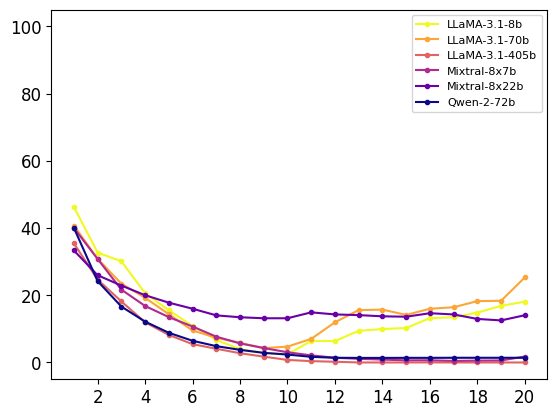

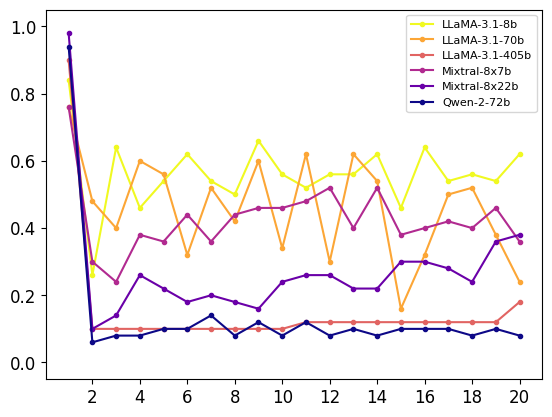

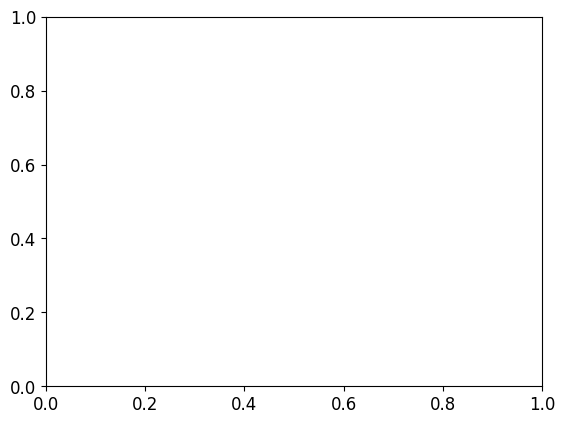

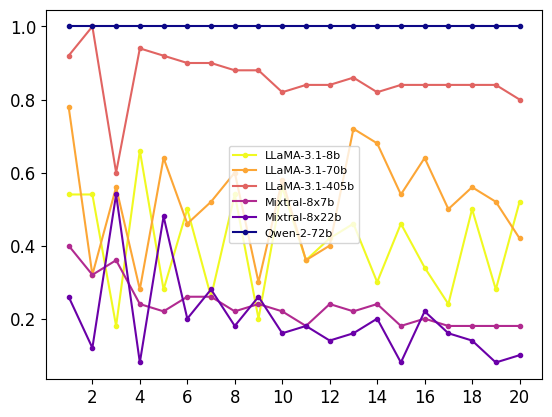

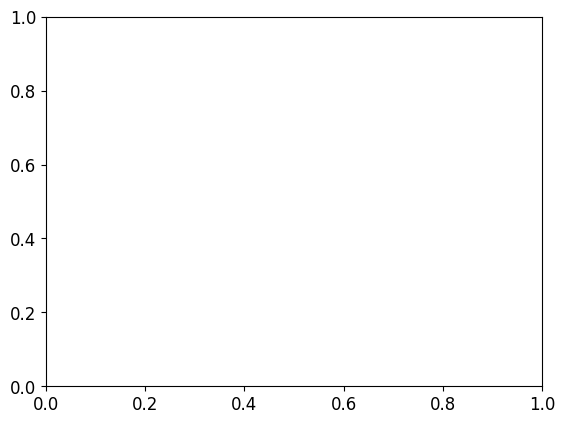

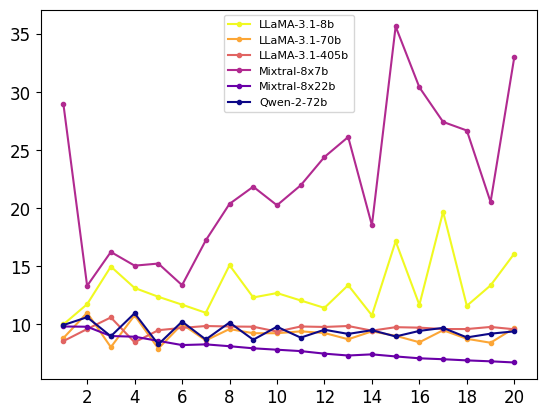

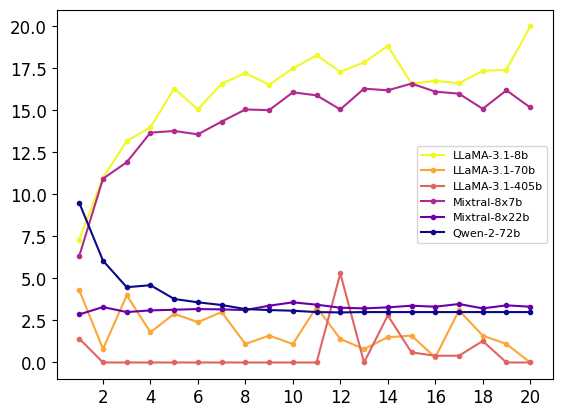

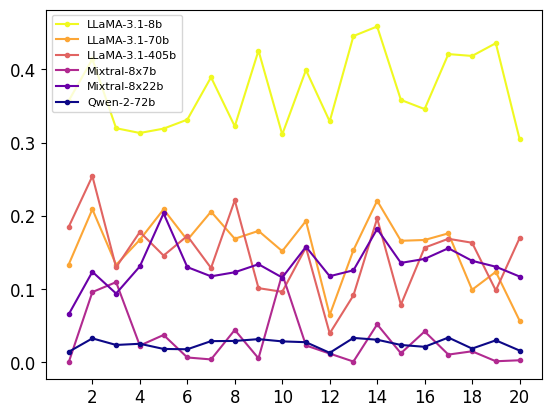

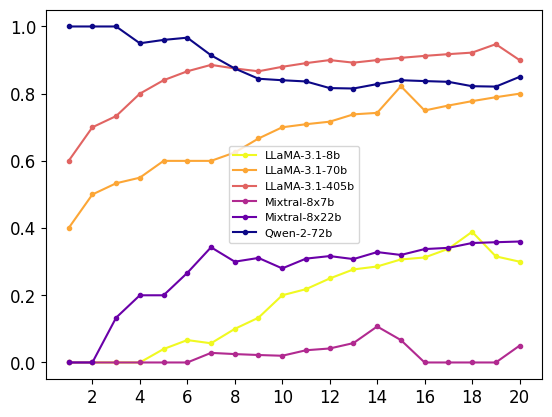

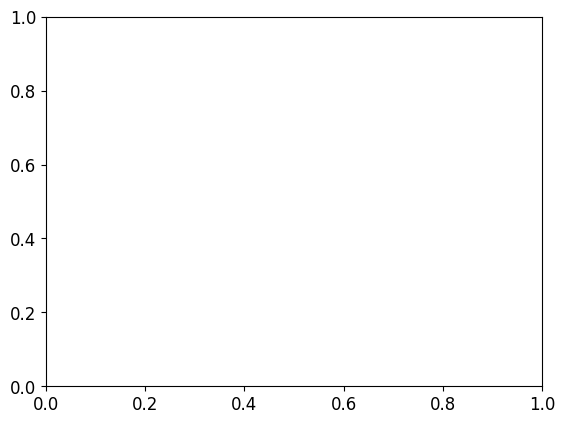

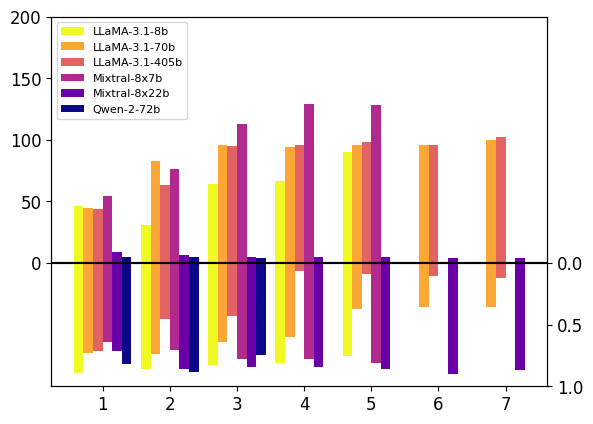

In [8]:
# Create a game plane
Games = [GuessingGame, BarGame, DinerDilemma, DivideDollar, PublicGoods, SealedBidAuction, BattleRoyale, PirateGame]
base_filename = "raw_results/{}/{}{}_v1_{}.json"
CLOSED_MODEL_LABEL = {
    "LLaMA-3.1-8b": "llama-3.1-8b_", 
    "LLaMA-3.1-70b": "llama-3.1-70b_",
    "LLaMA-3.1-405b": "llama-3.1-405b_",
    "Mixtral-8x7b": "mixtral-8x7b_",
    "Mixtral-8x22b": "mixtral-8x22b_",
    "Qwen-2-72b": "qwen2-72b_",
}
game_directory = {
    GuessingGame: "guessing_game",
    BarGame: "bar_game_implicit",
    DinerDilemma: "diner_dilemma",
    DivideDollar: "divide_dollar",
    PublicGoods: "public_goods",
    SealedBidAuction: "sealed_bid_auction/first_price",
    BattleRoyale: "battle_royale",
    PirateGame: "pirate_game"
}
game_ylim = {
    GuessingGame: (-5, 105),
    BarGame: (-0.05, 1.05),
    DinerDilemma: None,
    DivideDollar: None,
    PublicGoods: None,
    SealedBidAuction: None,
    BattleRoyale: (-0.05, 1.05),
    PirateGame: None,
}
for game in Games:
    plane = Analysis(game)
    for model_label in CLOSED_MODEL_LABEL.keys():
        if game != SealedBidAuction:
            files = [base_filename.format(game_directory[game], CLOSED_MODEL_LABEL[model_label], game_directory[game], i) for i in range(1,6)]
        else:
            files = [base_filename.format(game_directory[game], CLOSED_MODEL_LABEL[model_label], 'sealed_bid_auction', i) for i in range(1,6)]
        # Load the files with the same label
        plane.add_avg(files, model_label)

    # # Plot the game
    # if game_ylim[game] != None:
    #     plane.plot(xlabel="", loc='best', savename="closed-source_pirate_game")
    # else:
    if game != SealedBidAuction:
        plane.plot(xlabel="", loc='best', ylim=game_ylim[game], savename=f"open-source_{game_directory[game]}")
    else:
        plane.plot(xlabel="", loc='best', ylim=game_ylim[game], savename=f"open-source_sealed_bid_first_price")


/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:112: RuntimeWarning: Mean of empty slice
  L1_list = np.nanmean([t[0] for t in analysis], axis=0)  # Extract L1_list from tuples
/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:114: RuntimeWarning: Mean of empty slice
  accuracy_list = np.nanmean(accuracy_list, axis=0)


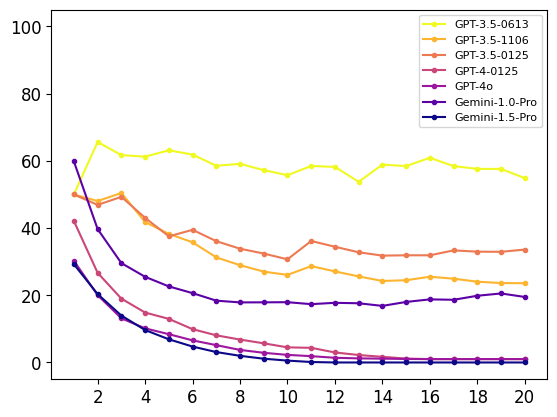

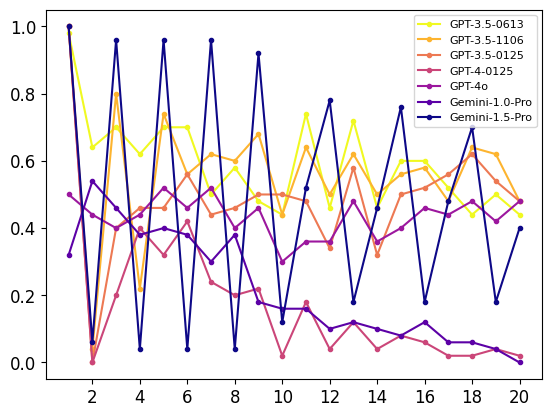

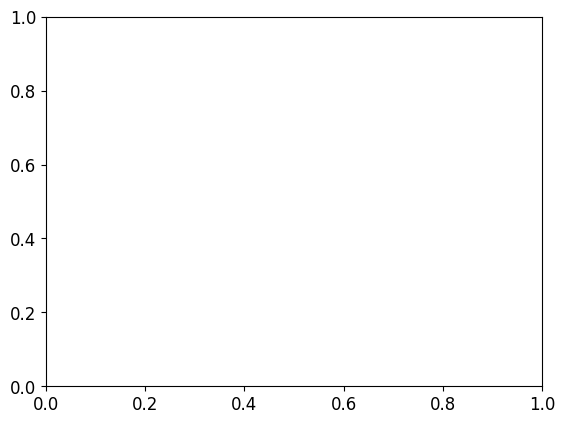

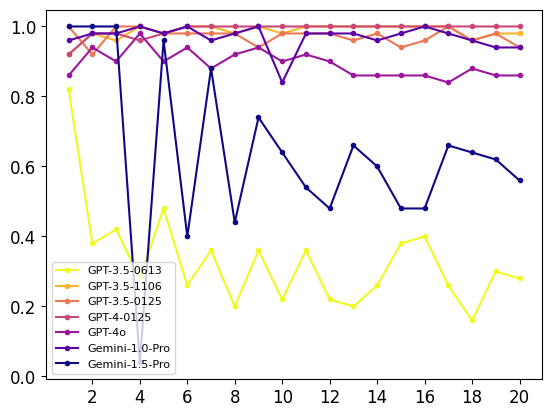

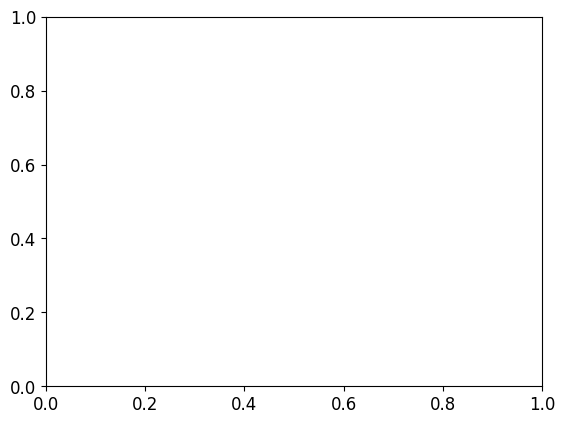

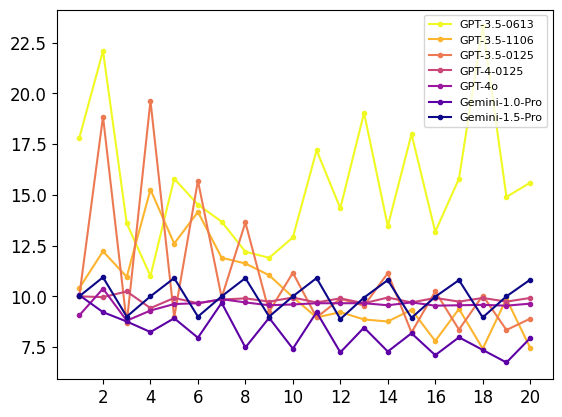

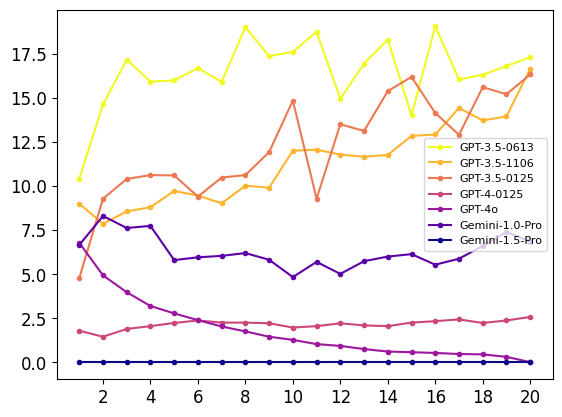

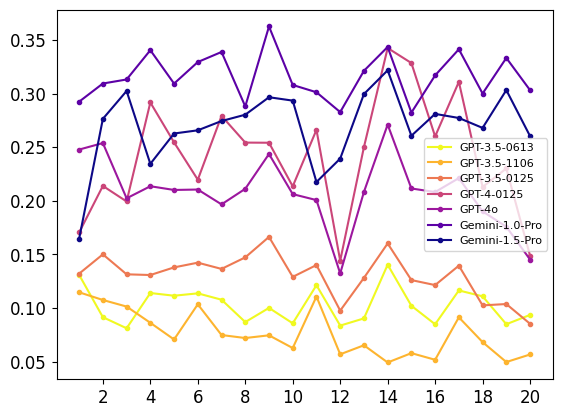

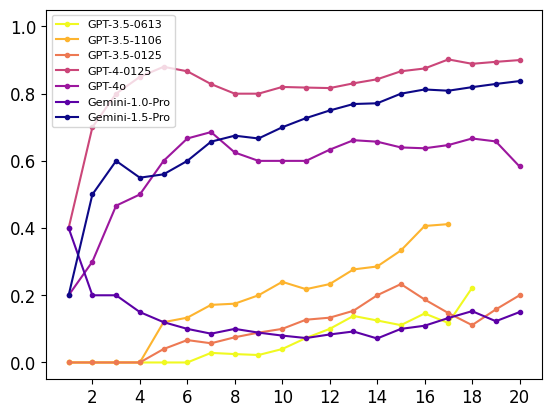

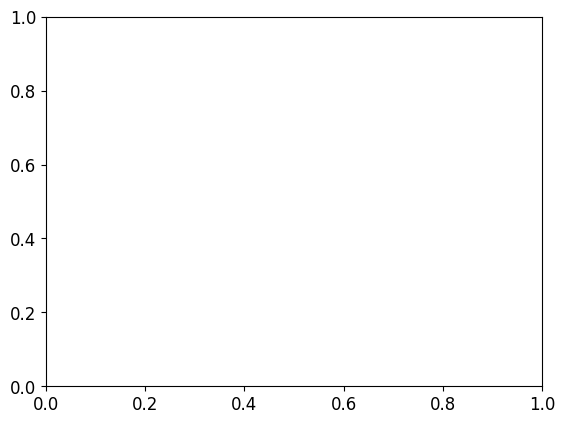

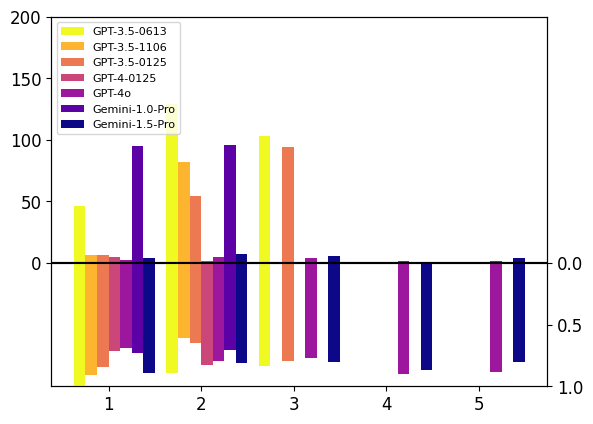

In [4]:
# Create a game plane
Games = [GuessingGame, BarGame, DinerDilemma, DivideDollar, PublicGoods, SealedBidAuction, BattleRoyale, PirateGame]
base_filename = "raw_results/{}/{}{}_v1_{}.json"
CLOSED_MODEL_LABEL = {
    "GPT-3.5-0613": "gpt-3.5-turbo-0613_", 
    "GPT-3.5-1106": "gpt-3.5-turbo-1106_",
    "GPT-3.5-0125": "",
    "GPT-4-0125": "gpt-4-0125-preview_",
    "GPT-4o": "gpt-4o_",
    "Gemini-1.0-Pro": "gemini-1.0-pro_",
    "Gemini-1.5-Pro": "gemini-1.5-pro_"
}
game_directory = {
    GuessingGame: "guessing_game",
    BarGame: "bar_game_implicit",
    DinerDilemma: "diner_dilemma",
    DivideDollar: "divide_dollar",
    PublicGoods: "public_goods",
    SealedBidAuction: "sealed_bid_auction/first_price",
    BattleRoyale: "battle_royale",
    PirateGame: "pirate_game"
}
game_ylim = {
    GuessingGame: (-5, 105),
    BarGame: (-0.05, 1.05),
    DinerDilemma: None,
    DivideDollar: None,
    PublicGoods: None,
    SealedBidAuction: None,
    BattleRoyale: (-0.05, 1.05),
    PirateGame: None,
}
for game in Games:
    plane = Analysis(game)
    for model_label in CLOSED_MODEL_LABEL.keys():
        if game != SealedBidAuction:
            files = [base_filename.format(game_directory[game], CLOSED_MODEL_LABEL[model_label], game_directory[game], i) for i in range(1,6)]
        else:
            files = [base_filename.format(game_directory[game], CLOSED_MODEL_LABEL[model_label], 'sealed_bid_auction', i) for i in range(1,6)]
        # Load the files with the same label
        plane.add_avg(files, model_label)

    # # Plot the game
    # if game_ylim[game] != None:
    #     plane.plot(xlabel="", loc='best', savename="closed-source_pirate_game")
    # else:
    if game != SealedBidAuction:
        plane.plot(xlabel="", loc='best', ylim=game_ylim[game], savename=f"closed-source_{game_directory[game]}")
    else:
        plane.plot(xlabel="", loc='best', ylim=game_ylim[game], savename=f"closed-source_sealed_bid_first_price")


In [ ]:
# Create a game plane
plane = Analysis(PublicGoods)

# Load the files with the same label
files = [f'raw_results/public_goods/public_goods_v1_{i}.json' for i in range(1,6)]
for i, file in enumerate(files):
    plane.add(file, f"test {i}")

# Plot the game
plane.plot(xlabel="", loc='best', savename="closed-source_public_goods_runs")

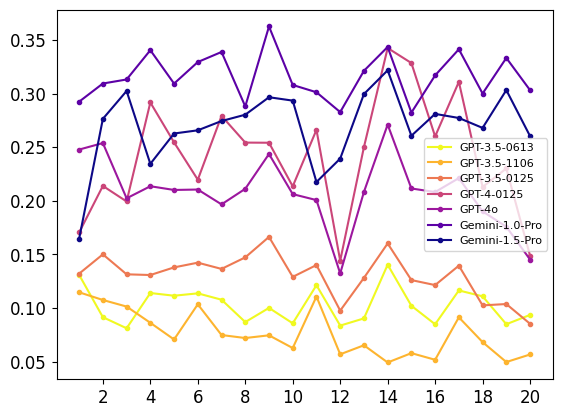

In [6]:
# Create a game plane
plane = Analysis(SealedBidAuction)

# Load the files with the same label
files = [f'raw_results/sealed_bid_auction/first_price/gpt-3.5-turbo-0613_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/sealed_bid_auction/first_price/gpt-3.5-turbo-1106_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/sealed_bid_auction/first_price/sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/sealed_bid_auction/first_price/gpt-4-0125-preview_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/sealed_bid_auction/first_price/gpt-4o_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4o")

files = [f'raw_results/sealed_bid_auction/first_price/gemini-1.0-pro_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/sealed_bid_auction/first_price/gemini-1.5-pro_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", loc='best', savename="closed-source_sealed_bid_auction_first_price")

In [ ]:
# Create a game plane
plane = Analysis(PublicGoods)

# Load the files with the same label
files = [f'raw_results/public_goods/gpt-3.5-turbo-0613_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/public_goods/gpt-3.5-turbo-1106_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/public_goods/public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/public_goods/gpt-4-0125-preview_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/public_goods/gemini-1.0-pro_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/public_goods/gemini-1.5-pro_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-1, 21), loc='best', savename="closed-source_public_goods")

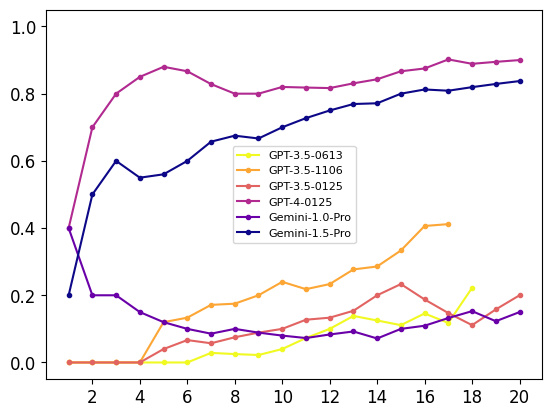

In [7]:
# Create a game plane
plane = Analysis(BattleRoyale)

# Load the files with the same label
files = [f'raw_results/battle_royale/gpt-3.5-turbo-0613_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/battle_royale/gpt-3.5-turbo-1106_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/battle_royale/battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/battle_royale/gpt-4-0125-preview_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/battle_royale/gemini-1.0-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/battle_royale/gemini-1.5-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-0.05, 1.05), loc='best', savename="closed-source_battle_royale")

In [ ]:
# Create a game plane
plane = Analysis(BarGame)

# Load the files with the same label
files = [f'raw_results/bar_game_implicit/gpt-3.5-turbo-0613_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/bar_game_implicit/gpt-3.5-turbo-1106_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/bar_game_implicit/bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/bar_game_implicit/gpt-4-0125-preview_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/bar_game_implicit/gemini-1.0-pro_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/bar_game_implicit/gemini-1.5-pro_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-0.05, 1.05), savename="closed-source_bar_game_implicit")

In [ ]:
# Create a game plane
plane = Analysis(GuessingGame)

# Load the files with the same label
files = [f'raw_results/guessing_game/gpt-3.5-turbo-0613_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/guessing_game/gpt-3.5-turbo-1106_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/guessing_game/guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/guessing_game/gpt-4-0125-preview_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/guessing_game/gemini-1.0-pro_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/guessing_game/gemini-1.5-pro_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_guessing_game")

In [ ]:
# Create a game plane
plane = Analysis(BattleRoyale)

# Load the files with the same label
files = [f'raw_results/battle_royale/gpt-3.5-turbo-0613_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/battle_royale/gpt-3.5-turbo-1106_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/battle_royale/battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/battle_royale/gpt-4-0125-preview_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/battle_royale/gemini-1.0-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/battle_royale/gemini-1.5-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_battle_royale")

In [ ]:
# Create a game plane
plane = Analysis(PirateGame)

# Load the files with the same label
files = [f'raw_results/pirate_game/gpt-3.5-turbo-0613_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/pirate_game/gpt-3.5-turbo-1106_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/pirate_game/pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/pirate_game/gpt-4-0125-preview_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/pirate_game/gemini-1.0-pro_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/pirate_game/gemini-1.5-pro_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_pirate_game")